# Using `gwent` to Generate Characteristic Strain Curves

Here we show examples of using the different classes in `gwent` for various detectors, both loading in from a file and generating with `gwent`, and binary black holes, both in the frequency and time domain.

First, we load important packages

In [1]:
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

from cycler import cycler
from scipy.constants import golden_ratio

import astropy.constants as const
import astropy.units as u

import gwent
import gwent.detector as detector
import gwent.binary as binary

#Turn off warnings for tutorial
import warnings
warnings.filterwarnings('ignore')

Setting matplotlib and plotting preferences

In [2]:
def get_fig_size(width=7,scale=1.0):
    #width = 3.36 # 242 pt
    base_size = np.array([1, 1/scale/golden_ratio])
    fig_size = width * base_size
    return(fig_size)
mpl.rcParams['figure.dpi'] = 300
mpl.rcParams['figure.figsize'] = get_fig_size()
mpl.rcParams['text.usetex'] = True
mpl.rc('font',**{'family':'serif','serif':['Times New Roman']})
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['legend.fontsize'] = 10
color_cycle_wong = ['#000000','#E69F00','#56B4E9','#009E73','#F0E442','#0072B2','#D55E00','#CC79A7']
mpl.rcParams['axes.prop_cycle'] = cycler(color=color_cycle_wong)

We need to get the file directories to load in the instrument files.

In [3]:
load_directory = gwent.__path__[0] + '/LoadFiles'

## Initialize different instruments

If loading a detector, the file should be frequency in the first column and either strain, effective strain noise spectral density, or amplitude spectral density in the second column.

For generating a detector, one must assign a value to each of the different instrument parameters (see the section on Declaring x and y variables and Sample Rates).


## Load ground instruments from files

#### aLIGO

In [4]:
Ground_T_obs = 4*u.yr

In [5]:
#aLIGO
aLIGO_filedirectory = load_directory + '/InstrumentFiles/aLIGO/'
aLIGO_1_filename = 'aLIGODesign.txt'
aLIGO_2_filename = 'ZERO_DET_high_P.txt'

aLIGO_1_filelocation = aLIGO_filedirectory + aLIGO_1_filename
aLIGO_2_filelocation = aLIGO_filedirectory + aLIGO_2_filename

aLIGO_1 = detector.GroundBased('aLIGO 1',Ground_T_obs,load_location=aLIGO_1_filelocation,I_type='A')
aLIGO_2 = detector.GroundBased('aLIGO 2',Ground_T_obs,load_location=aLIGO_2_filelocation,I_type='A')

#### Einstein Telescope

In [6]:
#Einstein Telescope
ET_filedirectory = load_directory + '/InstrumentFiles/EinsteinTelescope/'
ET_B_filename = 'ET_B_data.txt'
ET_C_filename = 'ET_C_data.txt'
ET_D_filename = 'ET_D_data.txt'

ET_B_filelocation = ET_filedirectory + ET_B_filename
ET_C_filelocation = ET_filedirectory + ET_C_filename
ET_D_filelocation = ET_filedirectory + ET_D_filename

ET_B = detector.GroundBased('ET',Ground_T_obs,load_location=ET_B_filelocation,I_type='A')
ET_C = detector.GroundBased('ET',Ground_T_obs,load_location=ET_C_filelocation,I_type='A')
ET_D = detector.GroundBased('ET',Ground_T_obs,load_location=ET_D_filelocation,I_type='A')

### Plots of Ground Detectors

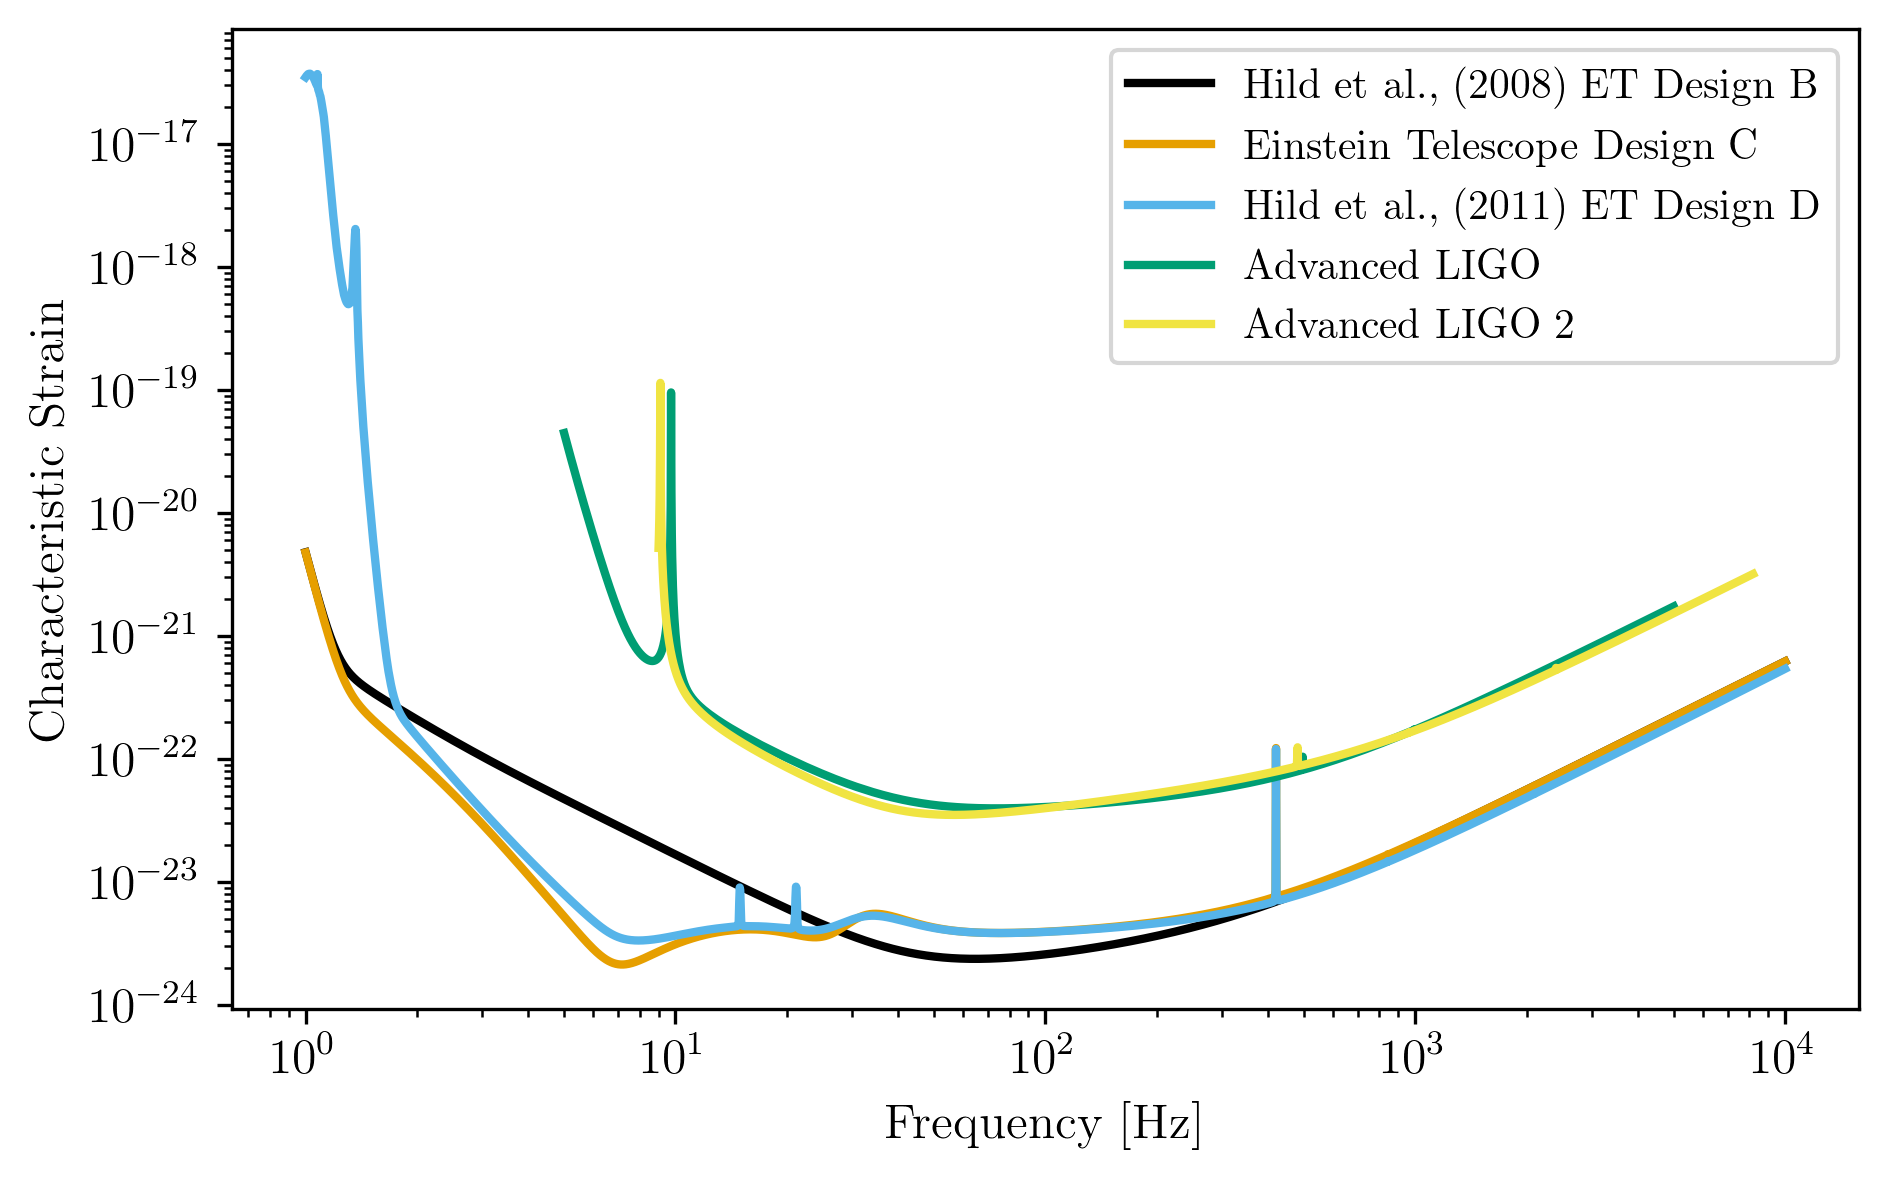

In [7]:
fig = plt.figure()
plt.loglog(ET_B.fT,ET_B.h_n_f,label='Hild et al., (2008) ET Design B')
plt.loglog(ET_C.fT,ET_C.h_n_f,label='Einstein Telescope Design C')
plt.loglog(ET_D.fT,ET_D.h_n_f,label='Hild et al., (2011) ET Design D')
plt.loglog(aLIGO_1.fT,aLIGO_1.h_n_f,label='Advanced LIGO')
plt.loglog(aLIGO_2.fT,aLIGO_2.h_n_f,label='Advanced LIGO 2')
plt.xlabel(r'Frequency [Hz]')
plt.ylabel(r'Characteristic Strain')
plt.tick_params(axis = 'both',which = 'major')
plt.legend()
plt.show()

## Load LISA Instruments from File

#### LISA Example 1

Modelled off of the Science Requirements document from https://lisa.nasa.gov/documentsReference.html.

In [8]:
SpaceBased_T_obs = 4*u.yr

In [9]:
LISA_Other_filedirectory = load_directory + '/InstrumentFiles/LISA_Other/'
LISA_ex1_filename = 'LISA_Allocation_S_h_tot.txt'
LISA_ex1_filelocation = LISA_Other_filedirectory + LISA_ex1_filename

#`I_type` should be Effective Noise Spectral Density
LISA_ex1 = detector.SpaceBased('LISA Example 1',SpaceBased_T_obs,load_location=LISA_ex1_filelocation,I_type='E')

#### LISA Example 2

Modelled off of Robson,Cornish,and Liu 2018, LISA (https://arxiv.org/abs/1803.01944).

In [10]:
LISA_ex2_filedirectory = load_directory + '/InstrumentFiles/LISA_Other/'
LISA_ex2_filename = 'LISA_sensitivity.txt'
LISA_ex2_filelocation = LISA_ex2_filedirectory + LISA_ex2_filename

#`I_type` should be Effective Noise Spectral Density
LISA_ex2 = detector.SpaceBased('LISA Example 2',SpaceBased_T_obs,load_location=LISA_ex2_filelocation,I_type='E')

#### LISA Example 3

Generated by http://www.srl.caltech.edu/~shane/sensitivity/

In [11]:
LISA_ex3_filename = 'scg_6981.dat'
LISA_ex3_filelocation = LISA_Other_filedirectory + LISA_ex3_filename

#`I_type` should be Amplitude Spectral Density
LISA_ex3 = detector.SpaceBased('LISA Example 3',SpaceBased_T_obs,load_location=LISA_ex3_filelocation,I_type='A')

### Plots of loaded LISA examples.

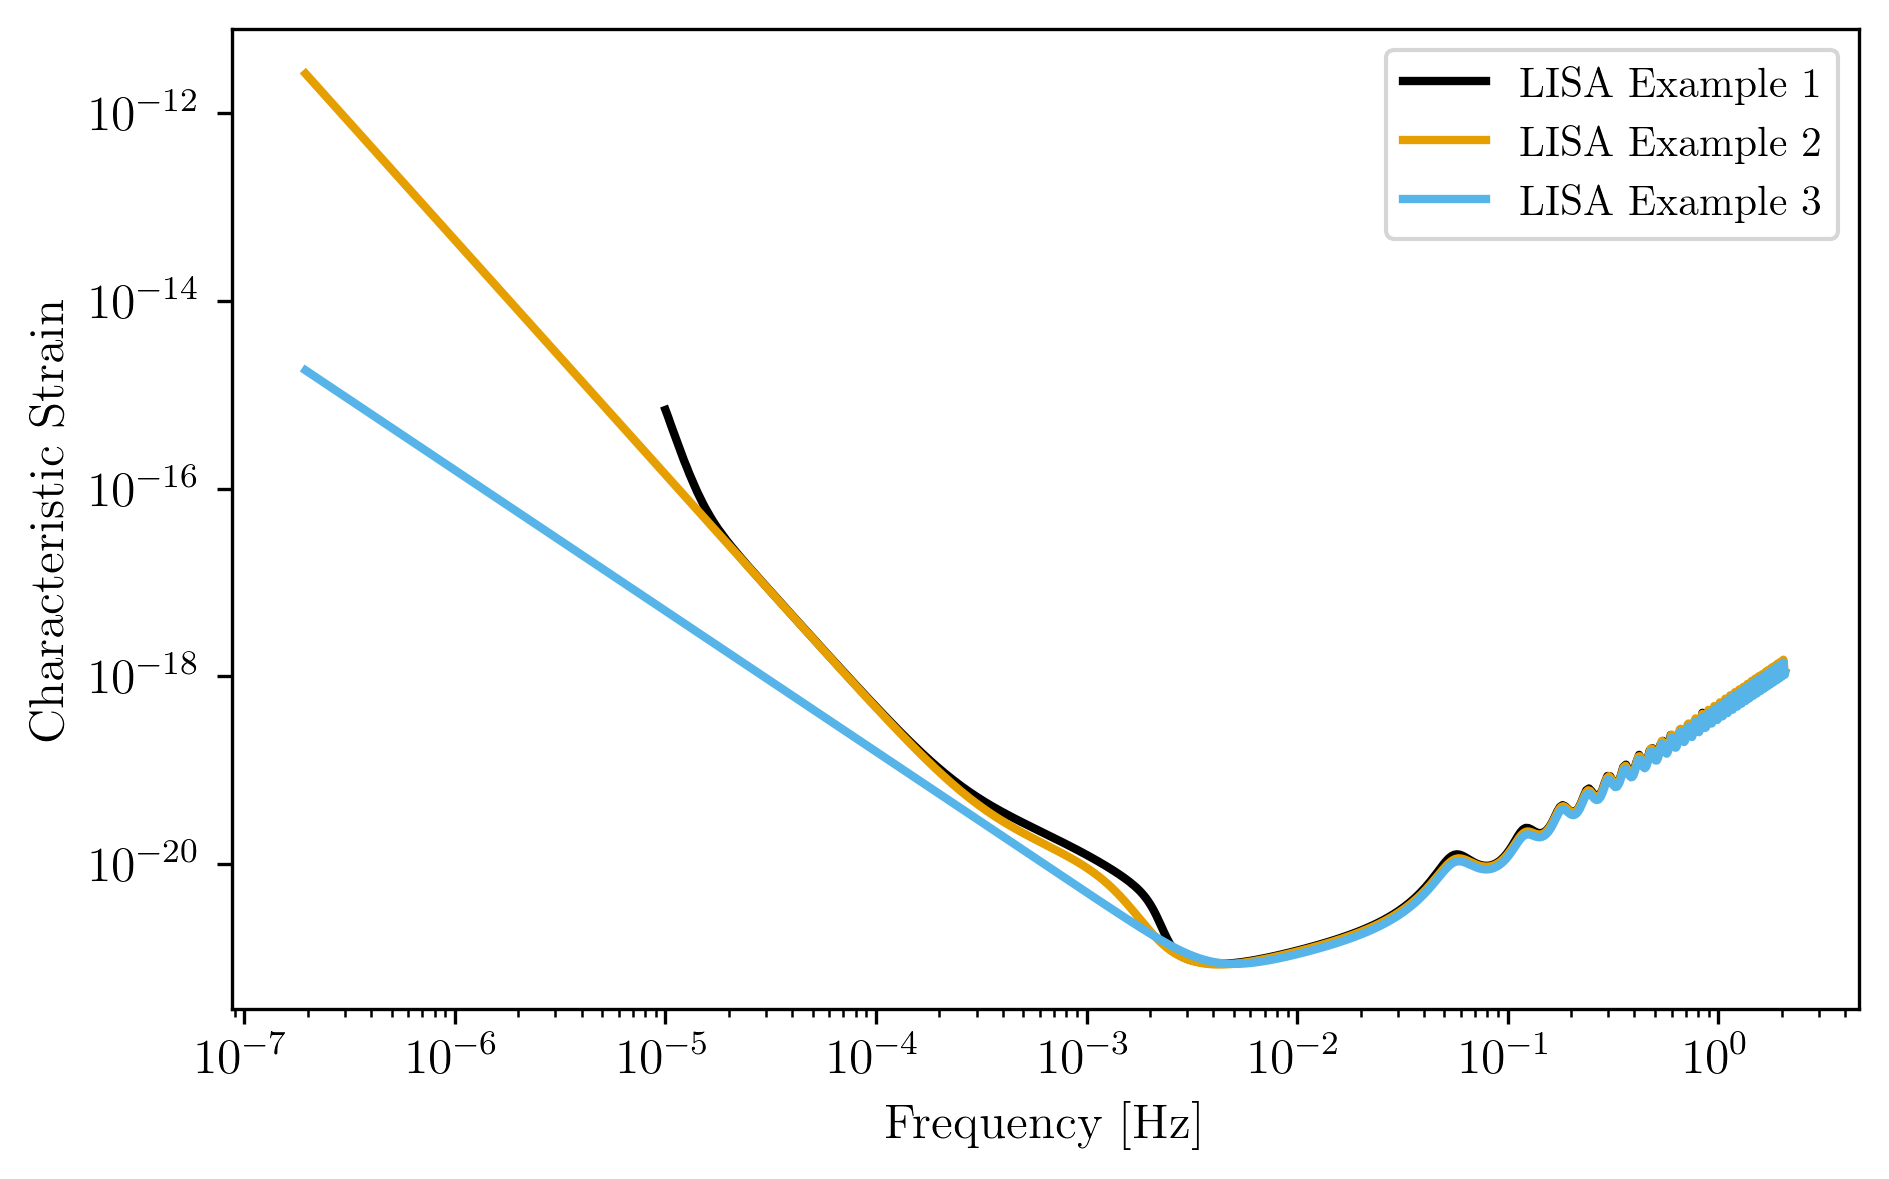

In [12]:
fig = plt.figure()
plt.loglog(LISA_ex1.fT,LISA_ex1.h_n_f,label=LISA_ex1.name)
plt.loglog(LISA_ex2.fT,LISA_ex2.h_n_f,label=LISA_ex2.name)
plt.loglog(LISA_ex3.fT,LISA_ex3.h_n_f,label=LISA_ex3.name)
plt.xlabel(r'Frequency [Hz]')
plt.ylabel(r'Characteristic Strain')
plt.tick_params(axis = 'both',which = 'major')
plt.legend()
plt.show()

## Loading PTA Detection Curves and Upper Limits

#### Simulated NANOGrav Continuous Wave Detection Sensitivity

Samples from Mingarelli, et al. 2017 (https://arxiv.org/abs/1708.03491) of the Simulated NANOGrav Continuous Wave Detection Sensitivity.

In [13]:
NANOGrav_filedirectory = load_directory + '/InstrumentFiles/NANOGrav/StrainFiles/' 

In [14]:
#NANOGrav continuous wave sensitivity
NANOGrav_background = 4e-16 # Unsubtracted GWB amplitude: 0,4e-16
NANOGrav_dp = 0.95 #Detection Probablility: 0.95,0.5
NANOGrav_fap = 0.0001 #False Alarm Probability: 0.05,0.003,0.001,0.0001
NANOGrav_Tobs = 15 #Observation years: 15,20,25

NANOGrav_filename = 'cw_simulation_Ared_' + str(NANOGrav_background) + '_dp_' + str(NANOGrav_dp) \
                    + '_fap_' + str(NANOGrav_fap) + '_T_' + str(NANOGrav_Tobs) + '.txt'
NANOGrav_filelocation = NANOGrav_filedirectory + NANOGrav_filename

NANOGrav_cw_GWB = detector.PTA('NANOGrav CW Detection w/ GWB',load_location=NANOGrav_filelocation,I_type='h')

In [15]:
#NANOGrav continuous wave sensitivity
NANOGrav_background_2 = 0 # Unsubtracted GWB amplitude: 0,4e-16
NANOGrav_dp_2 = 0.95 #Detection Probablility: 0.95,0.5
NANOGrav_fap_2 = 0.0001 #False Alarm Probability: 0.05,0.003,0.001,0.0001
NANOGrav_Tobs_2 = 15 #Observation years: 15,20,25

NANOGrav_filename_2 = 'cw_simulation_Ared_' + str(NANOGrav_background_2) + '_dp_' + str(NANOGrav_dp_2) \
                    + '_fap_' + str(NANOGrav_fap_2) + '_T_' + str(NANOGrav_Tobs_2) + '.txt'
NANOGrav_filelocation_2 = NANOGrav_filedirectory + NANOGrav_filename_2

NANOGrav_cw_no_GWB = detector.PTA('NANOGrav CW Detection no GWB',load_location=NANOGrav_filelocation_2,I_type='h')

#### NANOGrav Continuous Wave 11yr Upper Limit

Sample from Aggarwal, et al. 2019 (https://arxiv.org/abs/1812.11585) of the NANOGrav 11yr continuous wave upper limit.

In [16]:
NANOGrav_cw_ul_file = NANOGrav_filedirectory + 'smoothed_11yr.txt'
NANOGrav_cw_ul = detector.PTA('NANOGrav CW Upper Limit',load_location=NANOGrav_cw_ul_file,I_type='h')

#### NANOGrav 11yr Characteristic Strain

Using real NANOGrav 11yr data put through `hasasia`. We need to initialize and fill the values used in the plots (i.e., `NANOGrav_11yr_hasasia.T_obs` isn't known until we set the values since we loaded it from a file.

In [17]:
NANOGrav_11yr_hasasia_file = NANOGrav_filedirectory + 'NANOGrav_11yr_S_eff.txt'
NANOGrav_11yr_hasasia = detector.PTA('NANOGrav 11yr',load_location=NANOGrav_11yr_hasasia_file,I_type='E')
NANOGrav_11yr_hasasia.T_obs = 11.4*u.yr

### Plots of the loaded PTAs

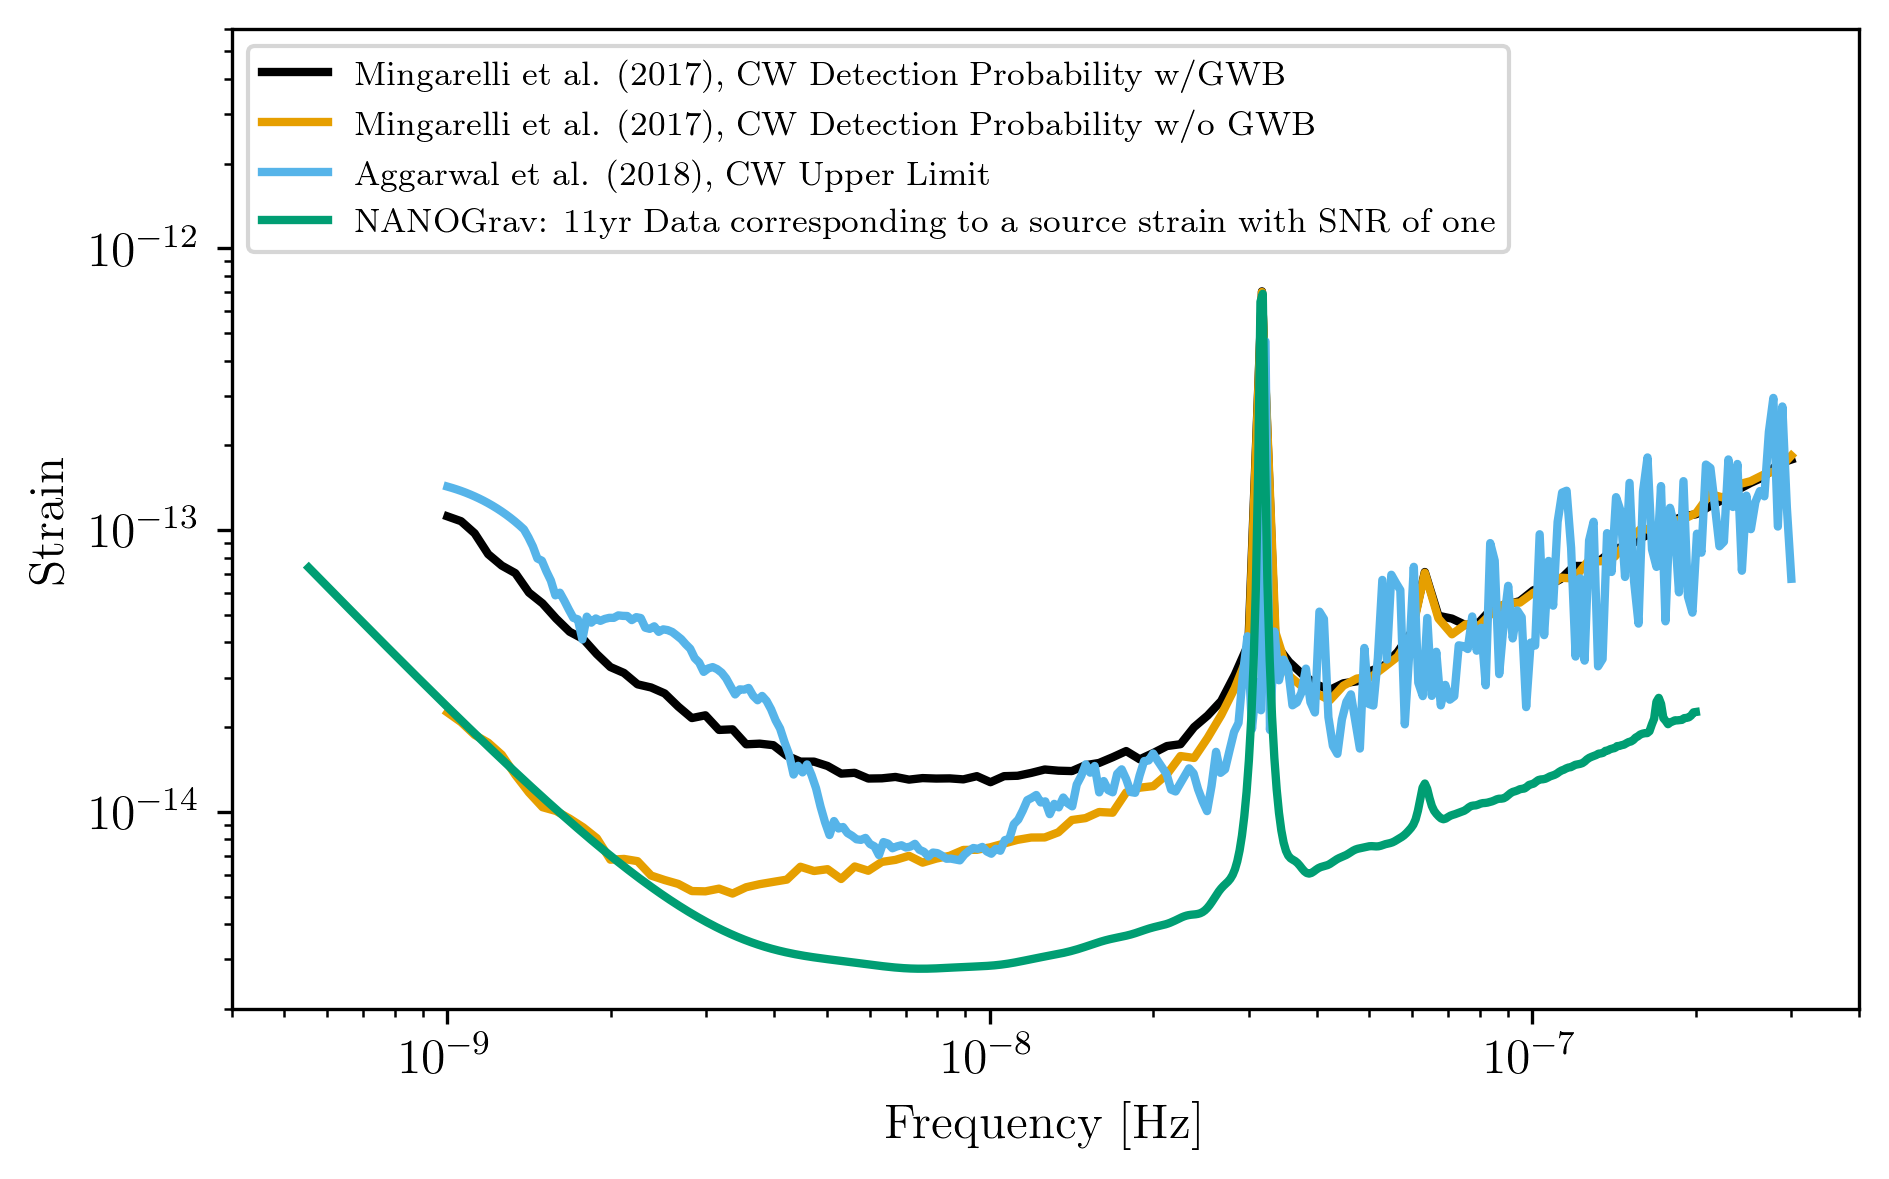

In [18]:
fig = plt.figure()
plt.loglog(NANOGrav_cw_GWB.fT,NANOGrav_cw_GWB.h_n_f,label = r'Mingarelli et al. (2017), CW Detection Probability w/GWB')
plt.loglog(NANOGrav_cw_no_GWB.fT,NANOGrav_cw_no_GWB.h_n_f, label =r'Mingarelli et al. (2017), CW Detection Probability w/o GWB')
plt.loglog(NANOGrav_cw_ul.fT,NANOGrav_cw_ul.h_n_f, label = r'Aggarwal et al. (2018), CW Upper Limit')
plt.loglog(NANOGrav_11yr_hasasia.fT,np.sqrt(NANOGrav_11yr_hasasia.S_n_f/np.max(np.unique(NANOGrav_11yr_hasasia.T_obs.to('s').value))),
           label = r'NANOGrav: 11yr Data  corresponding to a source strain with SNR of one')

plt.tick_params(axis = 'both',which = 'major')
plt.ylim([2e-15,6e-12])
plt.xlim([4e-10,4e-7])
plt.xlabel(r'Frequency [Hz]')
plt.ylabel('Strain')
plt.legend(loc='upper left',fontsize=8)
plt.show()

## Generating PTAs with `gwent`

Generated using the code `hasasia` (https://hasasia.readthedocs.io/en/latest/) via the methods of Hazboun, Romano, and Smith, 2019 (https://arxiv.org/abs/1907.04341)

#### SKA-esque Detector

Fiducial parameter estimates from Sesana, Vecchio, and Colacino, 2008 (https://arxiv.org/abs/0804.4476) section 7.1.

In [19]:
sigma_SKA = 10*u.ns.to('s')*u.s #sigma_rms timing residuals in nanoseconds to seconds
T_SKA = 15*u.yr #Observing time in years
N_p_SKA = 20 #Number of pulsars
cadence_SKA = 1/(u.wk.to('yr')*u.yr) #Avg observation cadence of 1 every week in [number/yr]

SKA with White noise only

In [20]:
SKA_WN = detector.PTA('SKA, WN Only',N_p_SKA,T_obs=T_SKA,sigma=sigma_SKA,cadence=cadence_SKA)

SKA with White and Varied Red Noise

In [21]:
SKA_WN_RN = detector.PTA('SKA, WN and RN',N_p_SKA,T_obs=T_SKA,sigma=sigma_SKA,cadence=cadence_SKA,
                         rn_amp=[1e-16,1e-12],rn_alpha=[-1/2,1.25])

SKA with White Noise and a Stochastic Gravitational Wave Background

In [22]:
SKA_WN_GWB = detector.PTA('SKA, WN and GWB',N_p_SKA,T_obs=T_SKA,sigma=sigma_SKA,cadence=cadence_SKA,
                          sb_amp=4e-16,sb_alpha=-2/3)

SKA with Sampled Noise for each pulsar, no GWB

In [23]:
SKA_Sampled_Noise = detector.PTA('SKA, Sampled Noise',N_p_SKA,cadence=[cadence_SKA,cadence_SKA/4.],
                                 sigma=[sigma_SKA,10*sigma_SKA],T_obs=T_SKA,use_11yr=True,use_rn=True)

### Plots for Simulated SKA PTAs

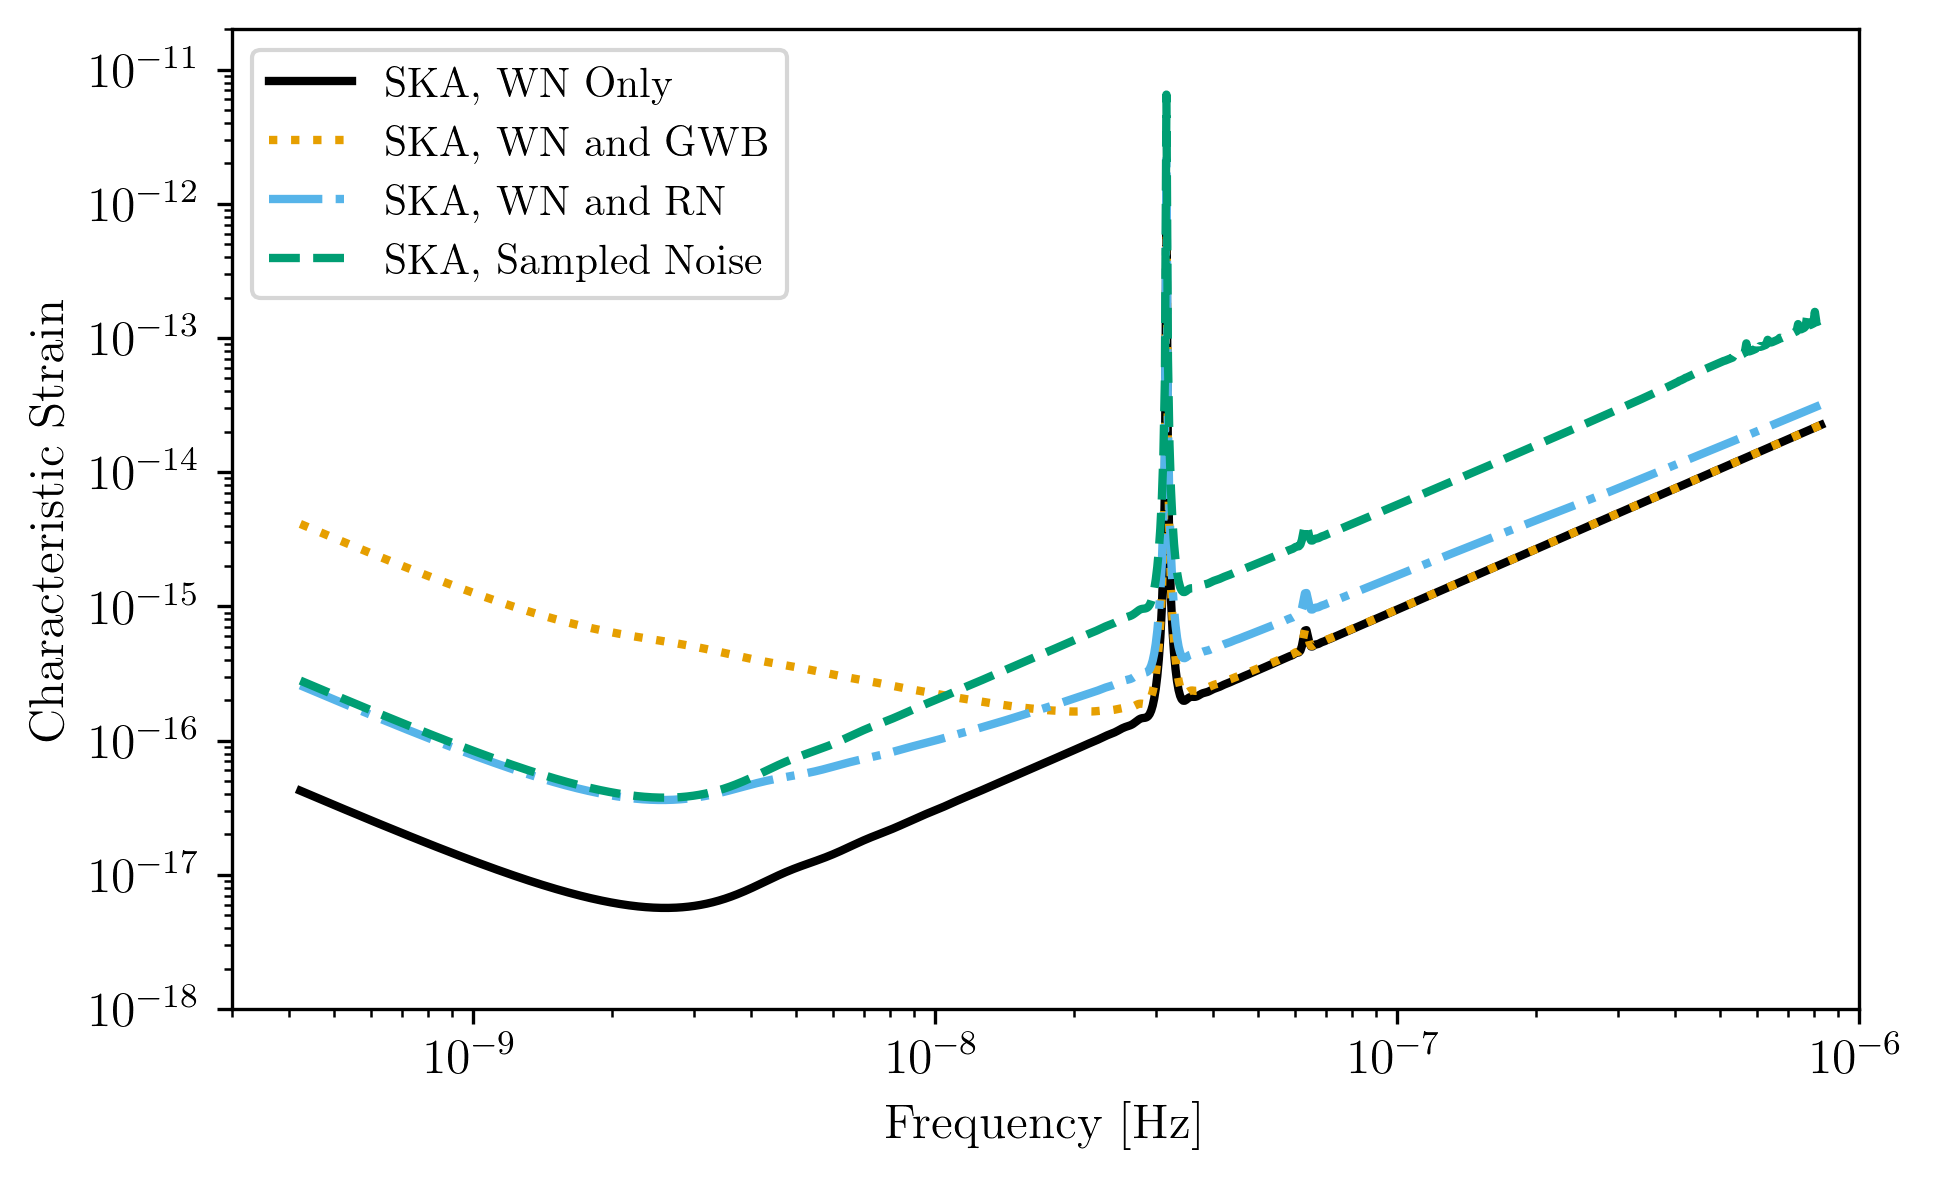

In [24]:
fig = plt.figure()
plt.loglog(SKA_WN.fT,SKA_WN.h_n_f,label = SKA_WN.name)
plt.loglog(SKA_WN_GWB.fT,SKA_WN_GWB.h_n_f, linestyle=':',label = SKA_WN_GWB.name)
plt.loglog(SKA_WN_RN.fT,SKA_WN_RN.h_n_f, linestyle='-.',label = SKA_WN_RN.name)
plt.loglog(SKA_Sampled_Noise.fT,SKA_Sampled_Noise.h_n_f,linestyle='--',label=SKA_Sampled_Noise.name)

plt.tick_params(axis = 'both',which = 'major')
plt.ylim([1e-18,2e-11])
plt.xlim([3e-10,1e-6])

plt.xlabel('Frequency [Hz]')
plt.ylabel('Characteristic Strain')
plt.legend(loc='upper left')
plt.show()

#### NANOGrav-esque Detector

Fiducial 11yr parameter estimates from Arzoumanian, et al., 2018 https://arxiv.org/abs/1801.01837

In [25]:
###############################################
#NANOGrav calculation using 11.5yr parameters https://arxiv.org/abs/1801.01837
sigma_nano = 100*u.ns.to('s')*u.s #rms timing residuals in nanoseconds to seconds
T_nano = 11.4*u.yr #Observing time in years
N_p_nano = 34 #Number of pulsars
cadence_nano = 1/(2*u.wk.to('yr')*u.yr) #Avg observation cadence of 1 every 2 weeks in number/year

NANOGrav with White Noise only

In [26]:
NANOGrav_WN = detector.PTA('NANOGrav, WN Only',N_p_nano,T_obs=T_nano,sigma=sigma_nano,cadence=cadence_nano)

NANOGrav with White and Varied Red Noise

In [27]:
NANOGrav_WN_RN = detector.PTA('NANOGrav, WN and RN',N_p_nano,T_obs=T_nano,sigma=sigma_nano,cadence=cadence_nano,
                              rn_amp=[1e-16,1e-12],rn_alpha=[-1/2,1.25])

NANOGrav with White Noise and a Stochastic Gravitational Wave Background

In [28]:
NANOGrav_WN_GWB = detector.PTA('NANOGrav, WN and GWB',N_p_nano,
                               T_obs=T_nano,sigma=sigma_nano,cadence=cadence_nano,sb_amp=4e-16)

NANOGrav with Sampled Noise for each pulsar, no GWB

In [29]:
NANOGrav_Sampled_Noise = detector.PTA('NANOGrav, Sampled Noise',N_p_nano,use_11yr=True,use_rn=True)

### Plots for Simulated NANOGrav PTAs

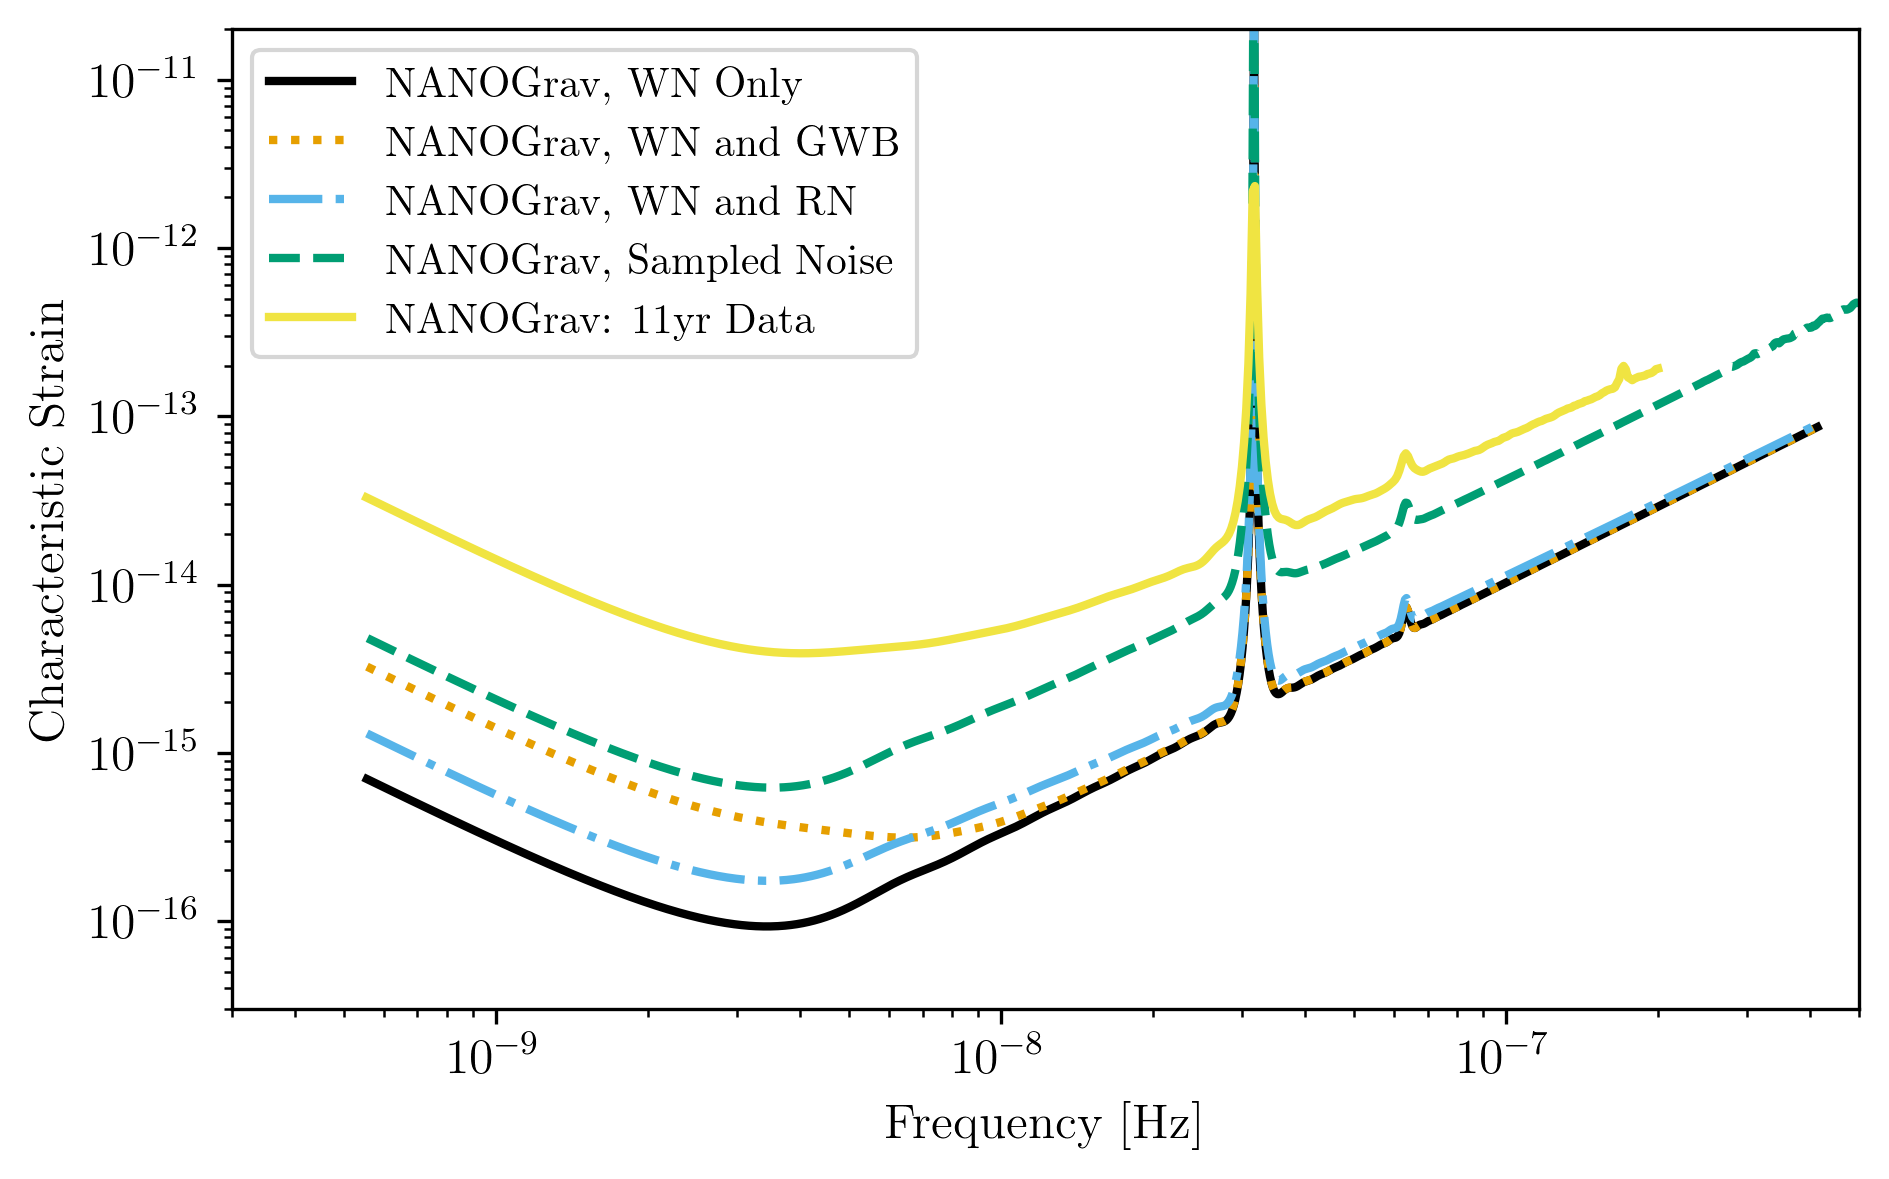

In [30]:
fig = plt.figure()
plt.loglog(NANOGrav_WN.fT,NANOGrav_WN.h_n_f,
           label=NANOGrav_WN.name)
plt.loglog(NANOGrav_WN_GWB.fT,NANOGrav_WN_GWB.h_n_f,
           linestyle=':',label=NANOGrav_WN_GWB.name)
plt.loglog(NANOGrav_WN_RN.fT,NANOGrav_WN_RN.h_n_f,
           linestyle='-.',label=NANOGrav_WN_RN.name)
plt.loglog(NANOGrav_Sampled_Noise.fT,NANOGrav_Sampled_Noise.h_n_f,
           linestyle='--',label=NANOGrav_Sampled_Noise.name)

plt.loglog(NANOGrav_11yr_hasasia.fT,NANOGrav_11yr_hasasia.h_n_f,
           label = r'NANOGrav: 11yr Data')

plt.tick_params(axis = 'both',which = 'major')
plt.ylim([3e-17,2e-11])
plt.xlim([3e-10,5e-7])

plt.xlabel('Frequency [Hz]')
plt.ylabel('Characteristic Strain')
plt.legend(loc='upper left')
plt.show()

## Generating LISA designs with `gwent`

First we set a fiducial armlength and observation time-length

In [31]:
L = 2.5*u.Gm  #armlength in Gm
L = L.to('m')
LISA_T_obs = 4*u.yr

#### LISA Proposal 1

Values taken from the ESA L3 proposal, Amaro-Seaone, et al., 2017 (https://arxiv.org/abs/1702.00786)

In [32]:
f_acc_break_low = .4*u.mHz.to('Hz')*u.Hz
f_acc_break_high = 8.*u.mHz.to('Hz')*u.Hz
f_IMS_break = 2.*u.mHz.to('Hz')*u.Hz
A_acc = 3e-15*u.m/u.s/u.s
A_IMS = 10e-12*u.m

Background = False

LISA_prop1 = detector.SpaceBased('LISA',\
                          LISA_T_obs,L,A_acc,f_acc_break_low,f_acc_break_high,A_IMS,f_IMS_break,\
                          Background=Background)

#### LISA Proposal 1 with Galactic Binary Background

Values taken from the ESA L3 proposal, Amaro-Seaone, et al., 2017 (https://arxiv.org/abs/1702.00786)

In [33]:
f_acc_break_low = .4*u.mHz.to('Hz')*u.Hz
f_acc_break_high = 8.*u.mHz.to('Hz')*u.Hz
f_IMS_break = 2.*u.mHz.to('Hz')*u.Hz
A_acc = 3e-15*u.m/u.s/u.s
A_IMS = 10e-12*u.m

Background = True

LISA_prop1_w_background = detector.SpaceBased('LISA w/Background',\
                          LISA_T_obs,L,A_acc,f_acc_break_low,f_acc_break_high,A_IMS,f_IMS_break,\
                          Background=Background)

#### LISA Proposal 2

Values from Robson, Cornish, and Liu 2019 https://arxiv.org/abs/1803.01944 using the Transfer Function Approximation within. (Note the factor of 2 change from summing 2 independent low-frequency data channels assumed in the paper.)

In [34]:
f_acc_break_low = .4*u.mHz.to('Hz')*u.Hz
f_acc_break_high = 8.*u.mHz.to('Hz')*u.Hz
f_IMS_break = 2.*u.mHz.to('Hz')*u.Hz
A_acc = 3e-15*u.m/u.s/u.s
A_IMS = 1.5e-11*u.m
Background = False
    
LISA_prop2 = detector.SpaceBased('LISA Approximate',\
                           LISA_T_obs,L,A_acc,f_acc_break_low,f_acc_break_high,A_IMS,f_IMS_break,\
                           Background=Background,T_type='A')

### Plots of Generated LISA Detectors

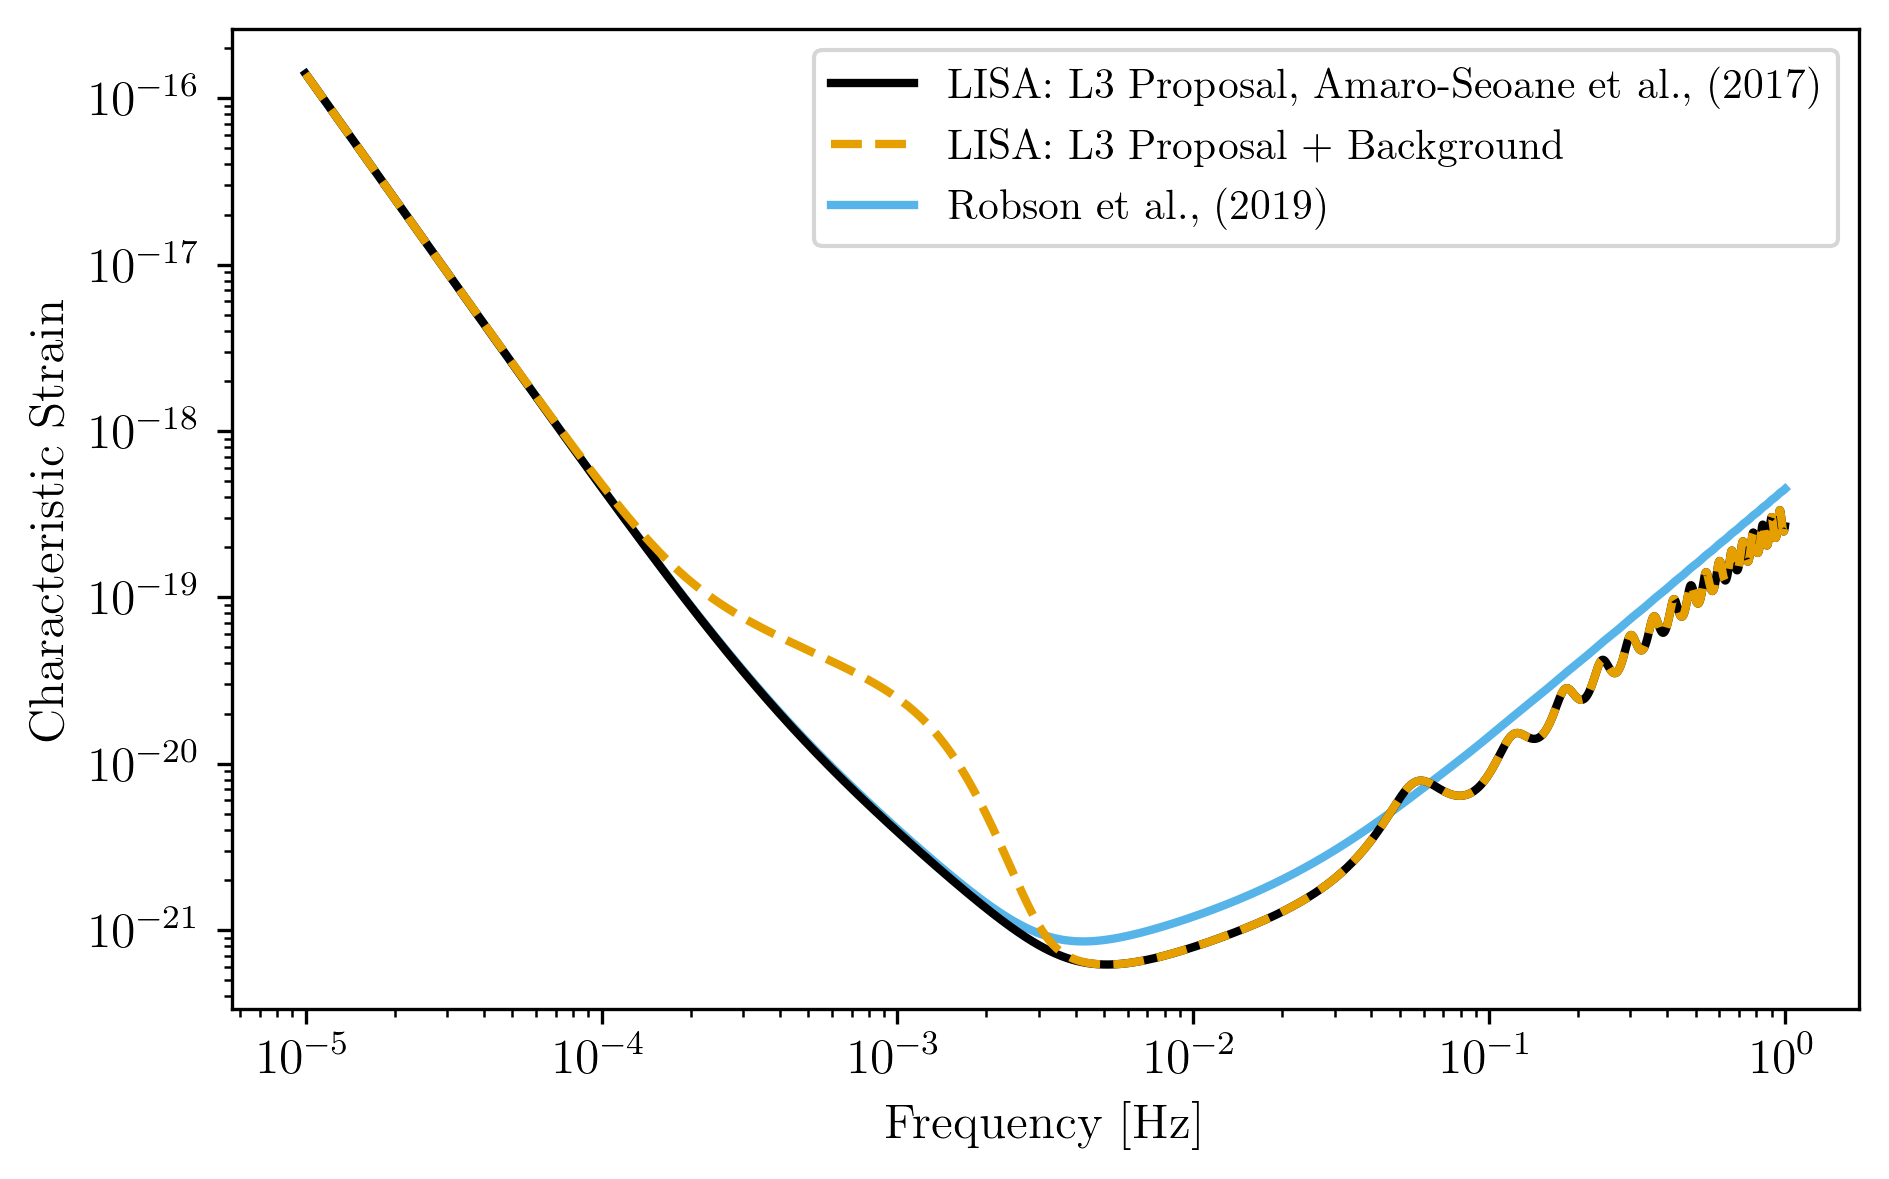

In [35]:
fig = plt.figure()
plt.loglog(LISA_prop1.fT,LISA_prop1.h_n_f,label=r'LISA: L3 Proposal, Amaro-Seoane et al., (2017)')
plt.loglog(LISA_prop1_w_background.fT,LISA_prop1_w_background.h_n_f,label=r'LISA: L3 Proposal + Background',
           linestyle='--')
plt.loglog(LISA_prop2.fT,LISA_prop2.h_n_f,label=r'Robson et al., (2019)',zorder=-1)
plt.xlabel(r'Frequency [Hz]')
plt.ylabel(r'Characteristic Strain')
plt.tick_params(axis = 'both',which = 'major')
plt.legend()
plt.show()

## Generating Ground Based Detector Designs with `gwent`

First we set a fiducial observation time-length

In [36]:
Ground_T_obs = 4*u.yr

#### aLIGO

In [37]:
aLIGO_prop1 = detector.GroundBased('aLIGO',Ground_T_obs,f_low=min(aLIGO_1.fT),f_high=max(aLIGO_1.fT))

If one wanted to change the parameters from the fiducial values, you could set up a new noise dictionary, then initialize that instument with the new values. It also works for updating the current instrument values.

In [38]:
noise_dict = {'Infrastructure':
                {'Length':2500},
              'Materials':
                {'Substrate':{'Temp':500}}}
aLIGO_prop2 = detector.GroundBased('aLIGO prop 2',Ground_T_obs,noise_dict=noise_dict)

#### A+

In [39]:
Aplus_prop1 = detector.GroundBased('Aplus',Ground_T_obs,f_low=min(aLIGO_1.fT),f_high=max(aLIGO_1.fT))

If you want to see what the current instrument parameters are, and what you can vary, you can use the `instrument.Get_Noise_Dict()`. To access each parameter, you must make a noise dictionary like above that matches the depth of the parameter you wish to change.

In [40]:
Aplus_prop1.Get_Noise_Dict()

Infrastructure Parameters:
     Length : 3995
     Temp : 290
     ResidualGas Subparameters:
          pressure : 4e-07
          mass : 3.35e-27
          polarizability : 7.8e-31
TCS Parameters:
     s_cc : 7.024
     s_cs : 7.321
     s_ss : 7.631
     SRCloss : 0.0
Seismic Parameters:
     Site : LHO
     KneeFrequency : 10
     LowFrequencyLevel : 1e-09
     Gamma : 0.8
     Rho : 1800.0
     Beta : 0.8
     Omicron : 1
     TestMassHeight : 1.5
     RayleighWaveSpeed : 250
Suspension Parameters:
     Type : Quad
     FiberType : Tapered
     BreakStress : 750000000.0
     Temp : 290
     Silica Subparameters:
          Rho : 2200.0
          C : 772
          K : 1.38
          Alpha : 3.9e-07
          dlnEdT : 0.000152
          Phi : 4.1e-10
          Y : 72000000000.0
          Dissdepth : 0.015
     C70Steel Subparameters:
          Rho : 7800
          C : 486
          K : 49
          Alpha : 1.2e-05
          dlnEdT : -0.00025
          Phi : 0.0002
          Y : 212000

#### Voyager

In [41]:
Voyager_prop1 = detector.GroundBased('Voyager',Ground_T_obs)

#### Cosmic Explorer

In [42]:
CE1_prop1 = detector.GroundBased('CE1',Ground_T_obs)

### Plots of Generated Ground Based Detectors

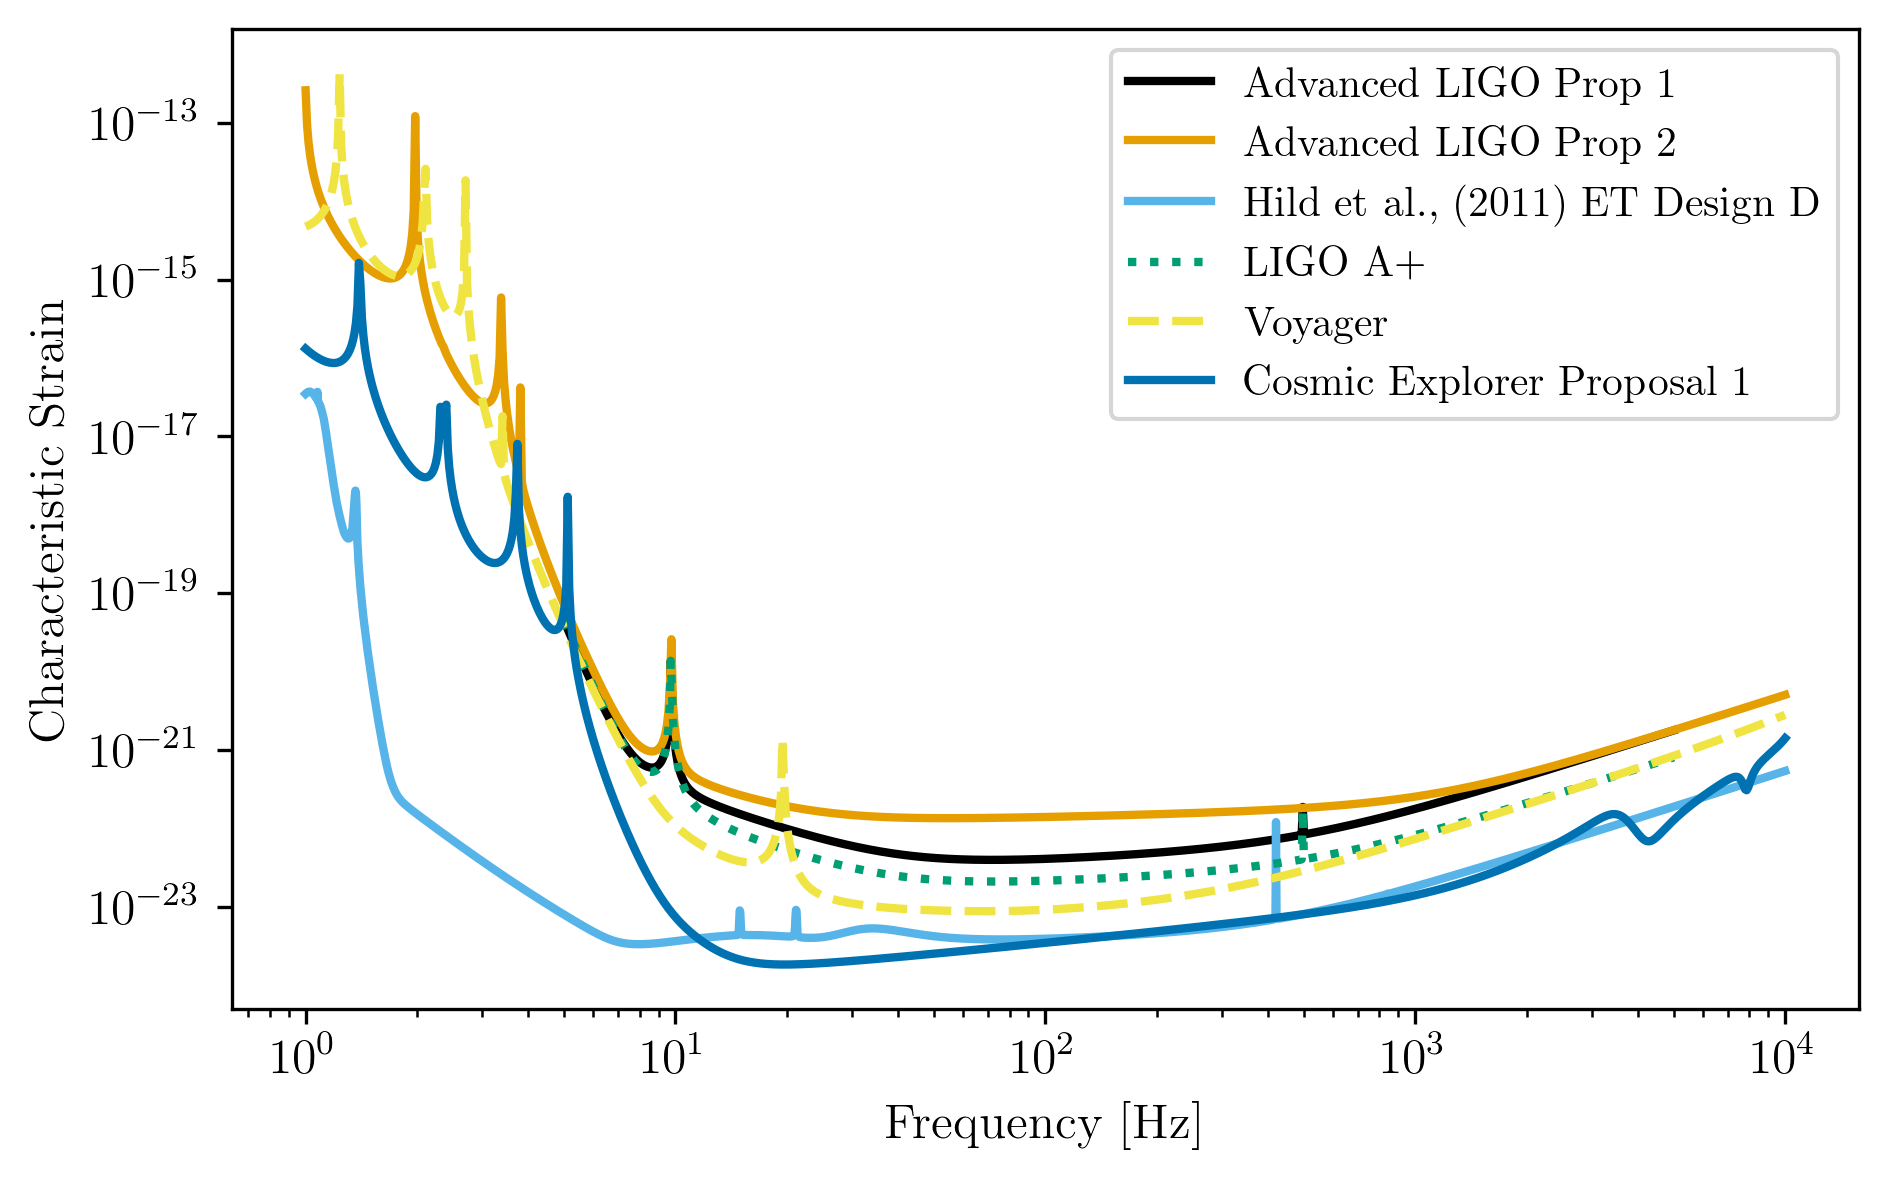

In [43]:
fig = plt.figure()
plt.loglog(aLIGO_prop1.fT,aLIGO_prop1.h_n_f,label='Advanced LIGO Prop 1')
plt.loglog(aLIGO_prop2.fT,aLIGO_prop2.h_n_f,label='Advanced LIGO Prop 2')

plt.loglog(ET_D.fT,ET_D.h_n_f,label='Hild et al., (2011) ET Design D')
plt.loglog(Aplus_prop1.fT,Aplus_prop1.h_n_f,label='LIGO A+',
           linestyle=':')
plt.loglog(Voyager_prop1.fT,Voyager_prop1.h_n_f,label='Voyager',
           linestyle='--')
plt.loglog(CE1_prop1.fT,CE1_prop1.h_n_f,label='Cosmic Explorer Proposal 1')
plt.xlabel(r'Frequency [Hz]')
plt.ylabel(r'Characteristic Strain')
plt.tick_params(axis = 'both',which = 'major')
plt.legend()
plt.show()

## Generating Binary Black Holes with `gwent` in the Frequency Domain

We start with BBH parameters that exemplify the range of IMRPhenomD's waveforms from Khan, et al. 2016 https://arxiv.org/abs/1508.07253 and Husa, et al. 2016 https://arxiv.org/abs/1508.07250 

For more information see the tutorial on source strains.

In [44]:
M = [1e6,65.0,1e10]
q = [1.0,18.0,1.0]
x1 = [0.95,0.0,-0.95]
x2 = [0.95,0.0,-0.95]
z = [3.0,0.093,20.0]

Uses the first parameter values and the `LISA_prop1` detector model for calculation of the monochromatic strain.

In [45]:
source_1 = binary.BBHFrequencyDomain(M[0],q[0],z[0],x1[0],x2[0],instrument=LISA_prop1)

Uses the first parameter values and the `aLIGO` detector model for calculation of the monochromatic strain.

In [46]:
source_2 = binary.BBHFrequencyDomain(M[1],q[1],z[1],x1[1],x2[1],instrument=aLIGO_1)

Uses the first parameter values and the `SKA_WN` detector model for calculation of the monochromatic strain.

In [47]:
source_3 = binary.BBHFrequencyDomain(M[2],q[2],z[2],x1[2],x2[2],instrument=SKA_WN)

Uses the first parameter values and the `ET` detector model for calculation of the monochromatic strain.

In [48]:
source_4 = binary.BBHFrequencyDomain(M[1],q[0],z[1],x1[1],x2[1],instrument=ET_B)

## Plots of Entire GW Band

Displays only generated detectors: WN only PTAs, ESA L3 proposal LISA, aLIGO, and Einstein Telescope.

Displays three sources' waveform along with their monochromatic strain if they were observed by the initialized instrument at the detector's most sensitive frequency throughout its observing run (from left to right: `SKA_WN`,`LISA_prop1`,`ET`).

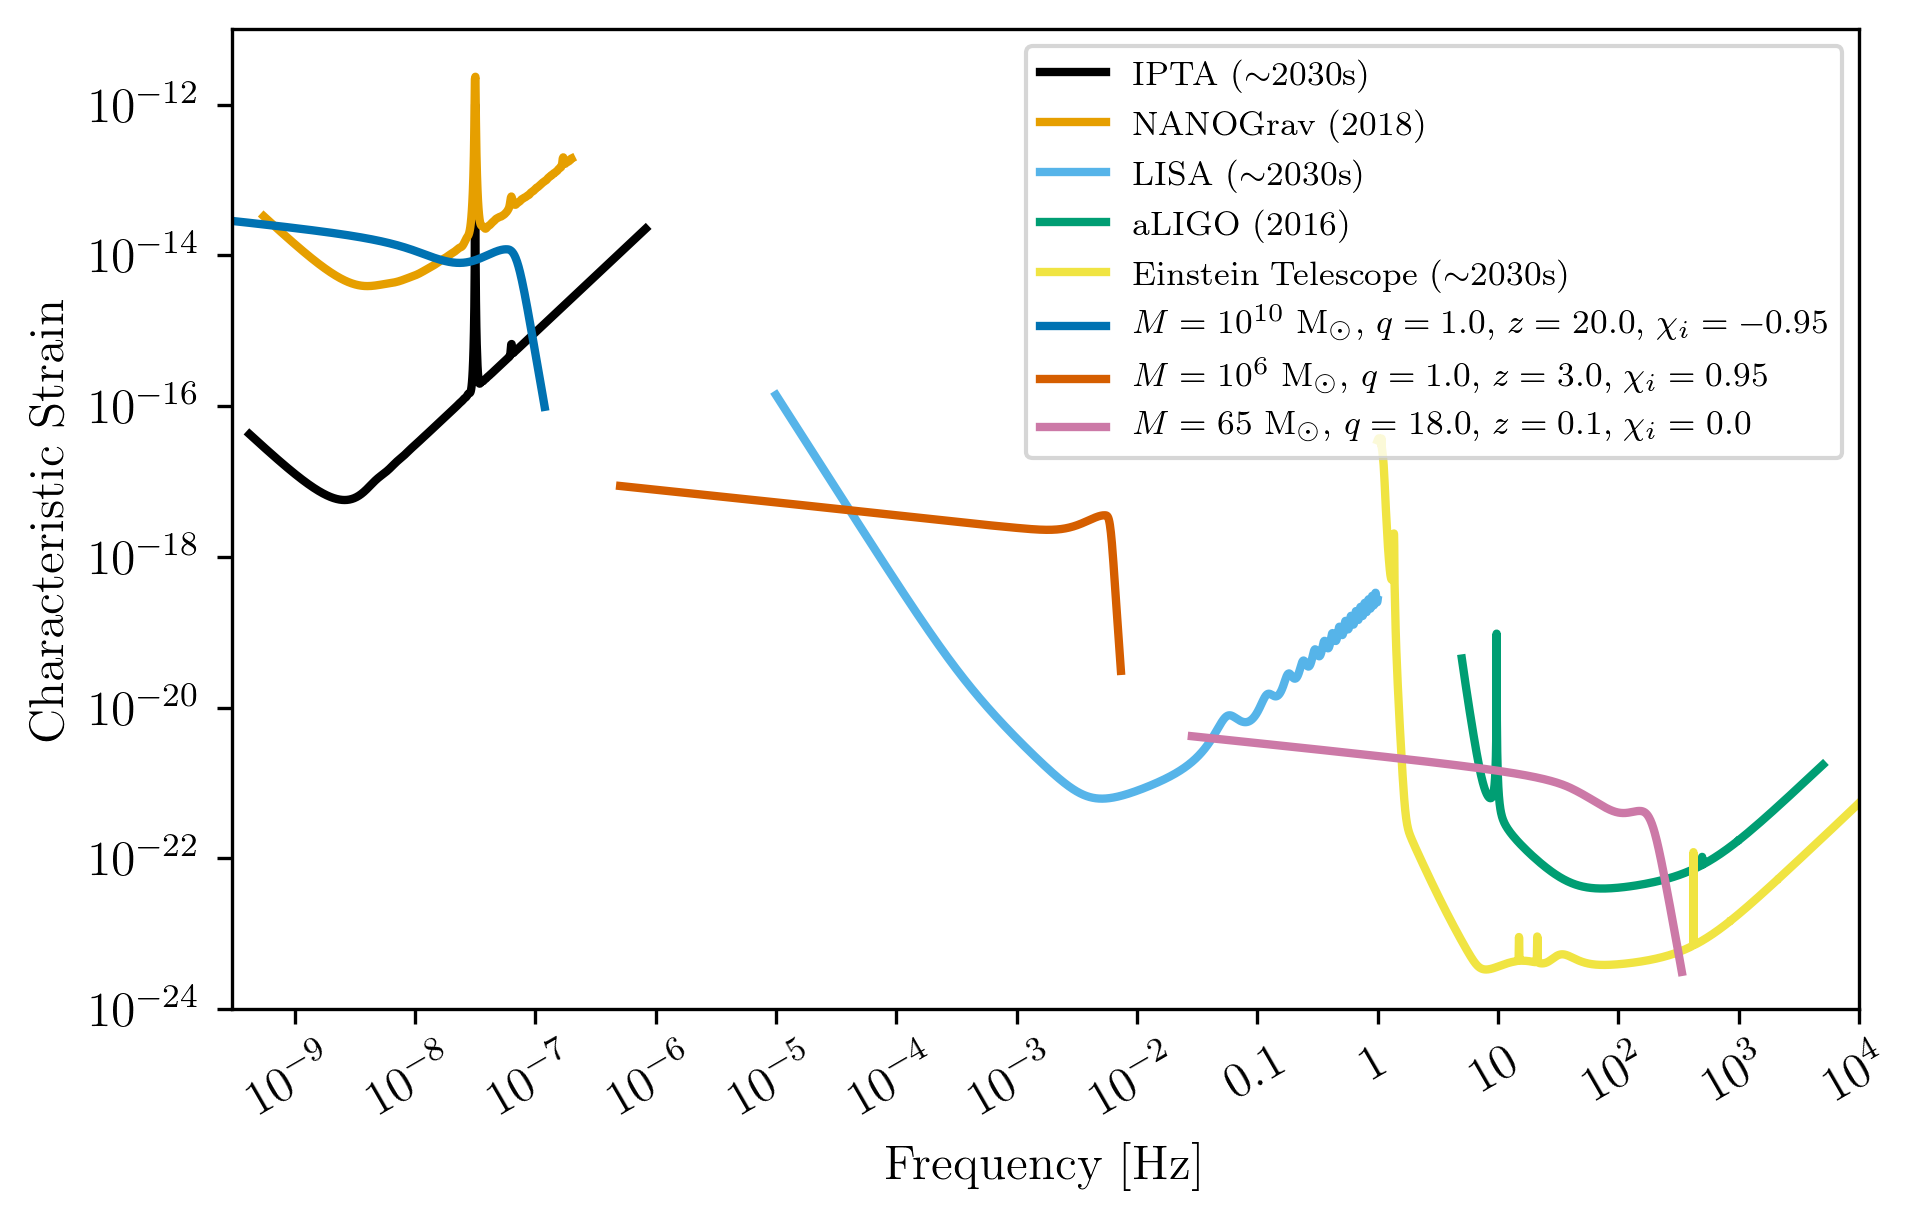

In [49]:
fig,ax = plt.subplots()

ax.loglog(SKA_WN.fT,SKA_WN.h_n_f,label = r'IPTA ($\sim$2030s)')
ax.loglog(NANOGrav_11yr_hasasia.fT,NANOGrav_11yr_hasasia.h_n_f,label = 'NANOGrav (2018)')
ax.loglog(LISA_prop1.fT,LISA_prop1.h_n_f,label = 'LISA ($\sim$2030s)')
ax.loglog(aLIGO_1.fT,aLIGO_1.h_n_f,label = 'aLIGO (2016)')
ax.loglog(ET_D.fT,ET_D.h_n_f,label = 'Einstein Telescope ($\sim$2030s)')

ax.loglog(source_3.f,binary.Get_Char_Strain(source_3),
          label = r'$M = 10^{%.0f}$ $\mathrm{M}_{\odot}$, $q = %.1f$, $z = %.1f$, $\chi_{i} = %.2f$' %(np.log10(M[2]),q[2],z[2],x1[2]))

ax.loglog(source_1.f,binary.Get_Char_Strain(source_1),
          label = r'$M = 10^{%.0f}$ $\mathrm{M}_{\odot}$, $q = %.1f$, $z = %.1f$, $\chi_{i} = %.2f$' %(np.log10(M[0]),q[0],z[0],x1[0]))

ax.loglog(source_2.f,binary.Get_Char_Strain(source_2),
          label = r'$M = %.0f$ $\mathrm{M}_{\odot}$, $q = %.1f$, $z = %.1f$, $\chi_{i} = %.1f$' %(M[1],q[1],z[1],x1[1]))

xlabel_min = -10
xlabel_max = 4
xlabels = np.arange(xlabel_min,xlabel_max+1)
#xlabels = xlabels[1::2]

ax.set_xticks(10.**xlabels)
print_xlabels = []
for x in xlabels:
    if abs(x) > 1:
        print_xlabels.append(r'$10^{%i}$' %x)
    elif x == -1:
        print_xlabels.append(r'$%.1f$' %10.**x)
    else:
        print_xlabels.append(r'$%.0f$' %10.**x)
ax.set_xticklabels([label for label in print_xlabels],rotation=30)

ax.set_xlim([3e-10, 1e4])
ax.set_ylim([1e-24, 1e-11])

ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Characteristic Strain')
ax.legend(loc='upper right',fontsize=8)
plt.show()